<a href="https://colab.research.google.com/github/Cristian-Larzabal/Data_science/blob/main/EntregaFinal/ProyectoParteIII%2BLarzabal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final

Archivo: ProyectoParteIII+Larzabal.ipynb


---



# Abstract

Este proyecto utiliza el dataset “Melbourne Housing Snapshot” proveniente de Kaggle, que reúne información detallada sobre más de 30.000 propiedades vendidas en la ciudad de Melbourne, Australia. La base de datos incluye una amplia variedad de atributos que describen tanto las características físicas de las viviendas como su contexto geográfico y temporal. Entre las principales variables se encuentran el tipo de vivienda, el precio de venta, la cantidad de dormitorios y baños, la superficie construida, el tamaño del terreno, el suburbio donde se localiza, la distancia al centro de la ciudad, el año de construcción, así como indicadores del entorno inmediato. Esta riqueza de información permite abordar un análisis integral del mercado inmobiliario de Melbourne.

Para ello se aplican técnicas de análisis univariado, bivariado y multivariado utilizando herramientas como pandas, Matplotlib y Seaborn. Se inicia con un proceso de limpieza de datos, detección de valores faltantes y tratamiento de outliers, seguido de la generación de visualizaciones que facilitan la interpretación de los resultados. Este análisis exploratorio no solo permite describir el comportamiento del mercado inmobiliario de Melbourne, sino que también sienta las bases para futuros modelos de predicción de precios, segmentación de propiedades o recomendaciones personalizadas para compradores e inversores.


---



# Preguntas / Hipótesis de interés


*   ¿Cuánto cuestan las propiedades “promedio”?
*   ¿Se observa que propiedades más cercanas al centro son más caras?
*   ¿Cómo se distribuyen los precios de venta de las propiedades según su tipo de vivienda?
*   ¿Cómo varía el precio promedio de las propiedades según la cantidad de dormitorios y el tipo de vivienda?




---



# Objetivo del Proyecto
El objetivo del proyecto es explorar el mercado inmobiliario desde una perspectiva descriptiva y visual, identificando patrones y relaciones significativas entre las distintas características de las propiedades y su valor de mercado. En particular, se busca responder preguntas sobre la distribución de precios, las diferencias entre suburbios y tipos de vivienda, la influencia del tamaño y la antigüedad de la propiedad en su precio, y cómo varían estas tendencias según el contexto geográfico y temporal.


---



# Visualizaciones y Análisis


---



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/Cristian-Larzabal/Data_science/refs/heads/main/PrimerEntrega/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Missing Values

In [3]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
BuildingArea,6450
YearBuilt,5375
CouncilArea,1369
Car,62


# Análisis Univariado


Cuartiles de Price:
Q1: 650000.0
Q2 (mediana): 903000.0
Q3: 1330000.0
IQR: 680000.0

Cantidad de outliers detectados: 612


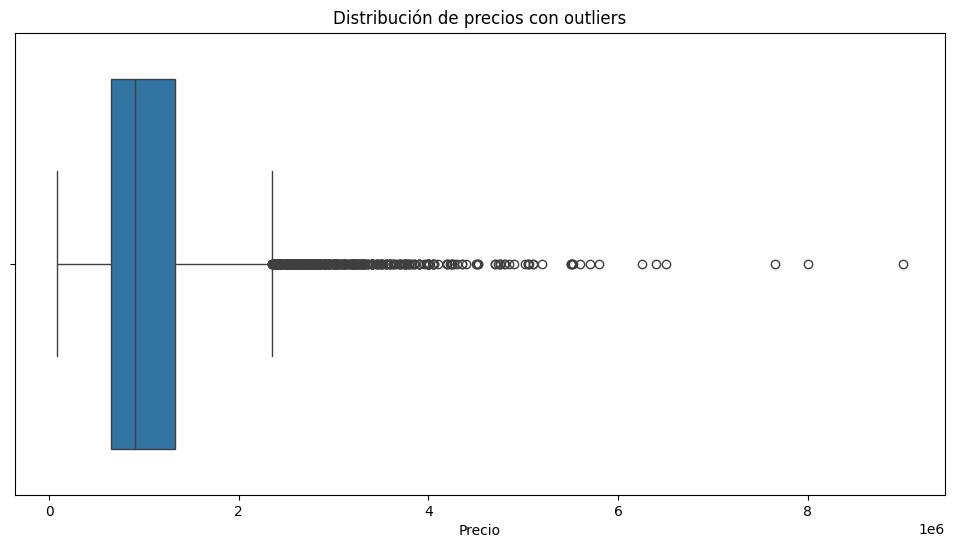

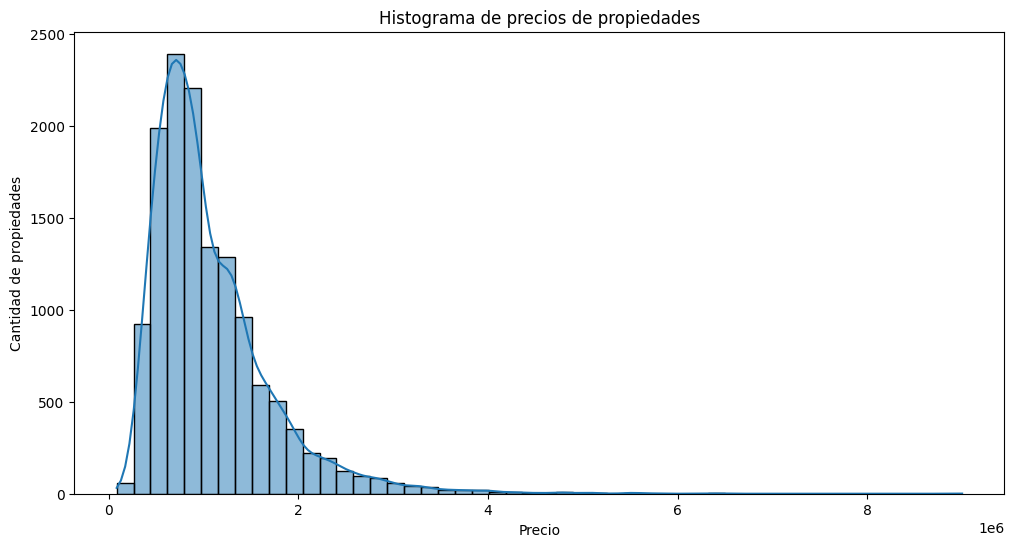

In [4]:
# 🔹 Calcular cuartiles y IQR
Q1 = df['Price'].quantile(0.25)
Q2 = df['Price'].quantile(0.50)  # mediana
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

print("\nCuartiles de Price:")
print("Q1:", Q1)
print("Q2 (mediana):", Q2)
print("Q3:", Q3)
print("IQR:", IQR)

# 🔹 Detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("\nCantidad de outliers detectados:", outliers.shape[0])

# 🔹 Visualización: boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Price'])
plt.title("Distribución de precios con outliers")
plt.xlabel("Precio")
plt.show()

print(" ")#Separacion entre graficos

# 🔹 Visualización: histograma
plt.figure(figsize=(12,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Histograma de precios de propiedades")
plt.xlabel("Precio")
plt.ylabel("Cantidad de propiedades")
plt.show()

# Análisis bivariado

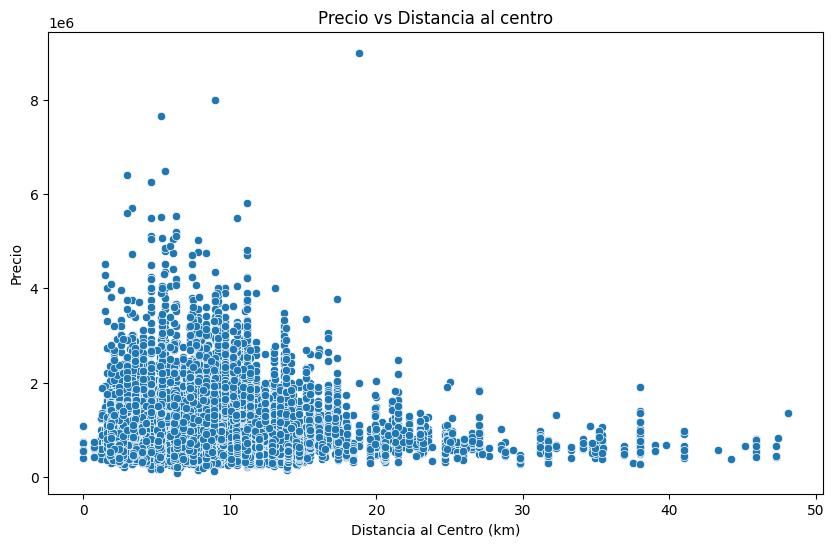

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title("Precio vs Distancia al centro")
plt.xlabel("Distancia al Centro (km)")
plt.ylabel("Precio")
plt.show()

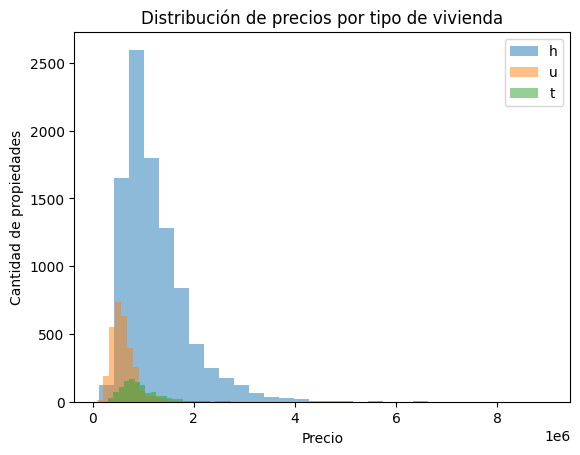

In [6]:
types = df['Type'].unique()
for t in types:
    subset = df[df['Type']==t]
    plt.hist(subset['Price'], bins=30, alpha=0.5, label=t)
#Tipo de vivienda
#h - casa, cabaña, villa, adosada, terraza
#u - unidad, dúplex
#t - casa adosada; dev site - sitio de desarrollo
plt.title("Distribución de precios por tipo de vivienda")
plt.xlabel("Precio")
plt.ylabel("Cantidad de propiedades")
plt.legend()
plt.show()

# Análisis multivariado


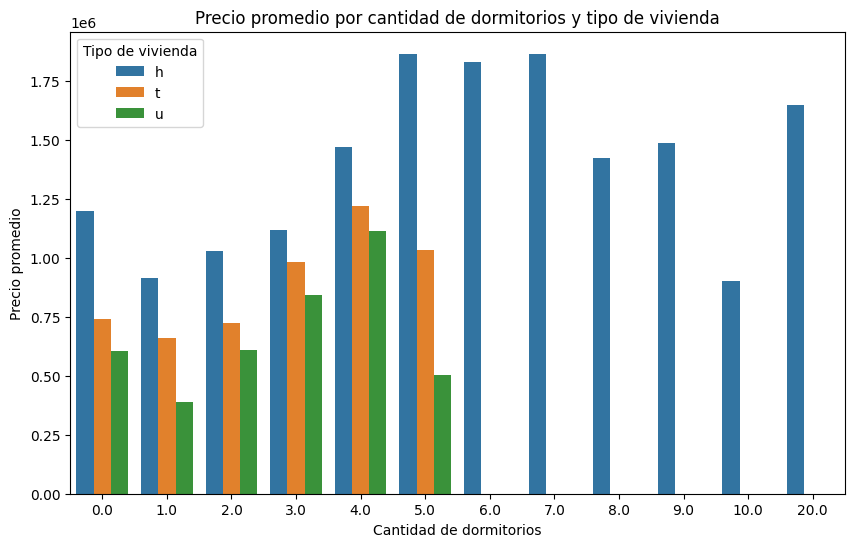

In [7]:
# Calcular precio promedio por tipo y cantidad de dormitorios
avg_price = df.groupby(['Bedroom2','Type'])['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x='Bedroom2', y='Price', hue='Type')
plt.title("Precio promedio por cantidad de dormitorios y tipo de vivienda")
plt.xlabel("Cantidad de dormitorios")
plt.ylabel("Precio promedio")
plt.legend(title="Tipo de vivienda")
plt.show()



---


# Conclusiones
Dado las preguntas realizadas podemos dar estar respuestas gracias a los analisis realizados:

*  El precio promedio (media) de las propiedades es aproximadamente 1.1 millon , con un precio mediano de 940.000. Los valores se distribuyen entre 80.000 y $5.000.000, indicando que la mayoría de las propiedades se concentran alrededor del rango medio, aunque hay algunos outliers de precios muy altos.

*   Sí, se observa una tendencia general donde las propiedades más cercanas al centro de Melbourne tienden a tener precios más altos, aunque hay cierta dispersión. A medida que aumenta la distancia, los precios promedio disminuyen, pero algunos suburbios lejanos todavía presentan propiedades caras.

*   Las casas (h) tienen la mayor concentración de precios altos, mientras que las unidades (u) suelen concentrarse en rangos de precios más bajos. Los townhouses (t) tienen una distribución más dispersa. Esto muestra que el tipo de vivienda influye significativamente en el rango de precios de venta.

*   En general, a mayor cantidad de dormitorios, mayor es el precio promedio, pero la magnitud depende del tipo de vivienda. Las casas (h) tienen precios más altos que las unidades o townhouses para la misma cantidad de dormitorios. Por ejemplo, una casa de 3 dormitorios es más cara que una unidad de 3 dormitorios. Esto confirma que tipo de vivienda y número de dormitorios juntos afectan significativamente el precio.


In [ ]:
dasdasdasdasda texto

In [ ]:
dsadasdasd codigo